In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data3_income census/adult.csv')
#age: numeric
#fnlwgt: numeric
#delete education because education number is repeating to this feature
#education_num: numeric
#capital_gain:numeric
#capital_loss:numeric
#hours_per_week:numeric
#native_country: has too many non-numeric values, delete
data=raw_data
data.drop
data['age']=raw_data.age
data['age']=data.age.astype(int)
data['fnlwgt']=raw_data.fnlwgt
data['fnlwgt']=data.fnlwgt.astype(int)
data['education_num']=raw_data.education_num
data['education_num']=data.education_num.astype(int)
data['capital_gain']=raw_data.capital_gain
data['capital_gain']=data.capital_gain.astype(int)
data['capital_loss']=raw_data.capital_loss
data['capital_loss']=data.capital_loss.astype(int)
data['hours_per_week']=raw_data.hours_per_week
data['hours_per_week']=data.hours_per_week.astype(int)

In [3]:
#convert workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
raw_data['workclass'] = raw_data.workclass.str.replace('Without-pay','0')
raw_data['workclass'] = raw_data.workclass.str.replace('Never-worked','1')
raw_data['workclass'] = raw_data.workclass.str.replace('Private','2')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-not-inc','3')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-inc','4')
raw_data['workclass'] = raw_data.workclass.str.replace('Federal-gov','5')
raw_data['workclass'] = raw_data.workclass.str.replace('Local-gov','6')
raw_data['workclass'] = raw_data.workclass.str.replace('State-gov','7')
raw_data['workclass'] = raw_data.workclass.str.replace('?','8')

data['workclass']=raw_data.workclass
data['workclass']=data.workclass.astype(int)

In [4]:
#convert marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse 
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-civ-spouse','0')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Divorced','1')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Never-married','2')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Separated','3')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Widowed','4')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-spouse-absent','5')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-AF-spouse','6')
data['marital_status']=raw_data.marital_status
data['marital_status']=data.marital_status.astype(int)

In [5]:
#convert occupation:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, 
#Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, 
#Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, 
#Armed-Forces
raw_data['occupation'] = raw_data.occupation.str.replace('Tech-support','0')
raw_data['occupation'] = raw_data.occupation.str.replace('Craft-repair','1')
raw_data['occupation'] = raw_data.occupation.str.replace('Other-service','2')
raw_data['occupation'] = raw_data.occupation.str.replace('Sales','3')
raw_data['occupation'] = raw_data.occupation.str.replace('Exec-managerial','4')
raw_data['occupation'] = raw_data.occupation.str.replace('Prof-specialty','5')
raw_data['occupation'] = raw_data.occupation.str.replace('Handlers-cleaners','6')
raw_data['occupation'] = raw_data.occupation.str.replace('Machine-op-inspct','7')
raw_data['occupation'] = raw_data.occupation.str.replace('Adm-clerical','8')
raw_data['occupation'] = raw_data.occupation.str.replace('Farming-fishing','9')
raw_data['occupation'] = raw_data.occupation.str.replace('Transport-moving','10')
raw_data['occupation'] = raw_data.occupation.str.replace('Priv-house-serv','11')
raw_data['occupation'] = raw_data.occupation.str.replace('Protective-serv','12')
raw_data['occupation'] = raw_data.occupation.str.replace('Armed-Forces','13')
raw_data['occupation'] = raw_data.occupation.str.replace('?','14')

data['occupation']=raw_data.occupation
data['occupation']=data.occupation.astype(int)

In [6]:
#relationship:Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
raw_data['relationship'] = raw_data.relationship.str.replace('Wife','0')
raw_data['relationship'] = raw_data.relationship.str.replace('Own-child','1')
raw_data['relationship'] = raw_data.relationship.str.replace('Husband','2')
raw_data['relationship'] = raw_data.relationship.str.replace('Not-in-family','3')
raw_data['relationship'] = raw_data.relationship.str.replace('Other-relative','4')
raw_data['relationship'] = raw_data.relationship.str.replace('Unmarried','5')
data['relationship']=raw_data.relationship
data['relationship']=data.relationship.astype(int)

In [7]:
#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
raw_data['race'] = raw_data.race.str.replace('White','0')
raw_data['race'] = raw_data.race.str.replace('Asian-Pac-Islander','1')
raw_data['race'] = raw_data.race.str.replace('Amer-Indian-Eskimo','2')
raw_data['race'] = raw_data.race.str.replace('Other','3')
raw_data['race'] = raw_data.race.str.replace('Black','4')
data['race']=raw_data.race
data['race']=data.race.astype(int)

In [8]:
#sex: Female, Male
raw_data['sex'] = raw_data.sex.str.replace('Female','0')
raw_data['sex'] = raw_data.sex.str.replace('Male','1')
data['sex']=raw_data.sex
data['sex']=data.sex.astype(int)

In [9]:
#set label_name column
data['income_name'] = raw_data.income

In [10]:
#income: >50K, <=50K
raw_data['income'] = raw_data.income.str.replace('>50K','1')
raw_data['income'] = raw_data.income.str.replace('<=50K','0')
raw_data['income'] = raw_data.income
raw_data['income'] = raw_data.income.astype(int)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_name
0,39,7,77516,Bachelors,13,2,8,3,0,1,2174,0,40,United-States,0,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,0,0,13,United-States,0,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,0,0,40,United-States,0,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,0,0,40,United-States,0,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,0,0,40,Cuba,0,<=50K


In [11]:
datalist_label = data.income
datalist_names = data.income_name
datalist_label_names = np.array(['>50K','<=50K'])
datalist = data.drop(['fnlwgt','education','native_country','income','income_name'], axis=1)
datalist_array = datalist.values
datalist_array

array([[   39,     7,    13, ...,  2174,     0,    40],
       [   50,     3,    13, ...,     0,     0,    13],
       [   38,     2,     9, ...,     0,     0,    40],
       ..., 
       [   58,     2,     9, ...,     0,     0,    40],
       [   22,     2,     9, ...,     0,     0,    20],
       [   52,     4,     9, ..., 15024,     0,    40]])

In [12]:
datalist.describe()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.028715,10.080679,1.077485,5.259636,2.380854,0.459752,0.669205,1077.648844,87.303830,40.437456
std,13.640433,1.865273,2.572720,1.185543,3.596131,1.237468,1.211933,0.470506,7385.292085,402.960219,12.347429
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,2.000000,10.000000,1.000000,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,3.000000,12.000000,2.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000


In [13]:
data.pivot_table(index='income_name', values=['age','workclass','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week'],aggfunc=np.mean)

,age,capital_gain,capital_loss,education_num,hours_per_week,marital_status,occupation,race,relationship,sex,workclass
income_name,,,,,,,,,,,
<=50K,36.783738,148.752468,53.142921,9.595065,38.840210,1.329733,5.426901,0.525850,2.500566,0.611974,3.012783
>50K,44.249841,4006.142456,195.001530,11.611657,45.473026,0.282234,4.732305,0.251371,2.003443,0.849637,3.078944


In [14]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_name
0,39,7,77516,Bachelors,13,2,8,3,0,1,2174,0,40,United-States,0,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,0,0,13,United-States,0,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,0,0,40,United-States,0,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,0,0,40,United-States,0,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,0,0,40,Cuba,0,<=50K


In [15]:
d_corr=data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,14]].corr()
d_corr
#acceptable related to safety most, for features only lug_boot related to persons

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
age,1.000000,0.123757,0.036527,-0.220938,0.040707,0.128919,-0.029869,0.088832,0.077674,0.057775,0.068756,0.234037
workclass,0.123757,1.000000,0.081700,0.010313,0.462679,-0.018363,0.038328,-0.046918,0.001275,0.006988,-0.088747,0.015166
education_num,0.036527,0.081700,1.000000,-0.107648,-0.075714,-0.031898,-0.078799,0.012280,0.122630,0.079923,0.148123,0.335154
marital_status,-0.220938,0.010313,-0.107648,1.000000,0.060346,0.362819,0.131782,-0.380043,-0.074308,-0.066966,-0.221882,-0.377794
occupation,0.040707,0.462679,-0.075714,0.060346,1.000000,-0.018398,0.045215,-0.073014,-0.019173,-0.021487,-0.070831,-0.082588
relationship,0.128919,-0.018363,-0.031898,0.362819,-0.018398,1.000000,0.120530,-0.169737,-0.026656,-0.030640,0.056941,-0.171771
race,-0.029869,0.038328,-0.078799,0.131782,0.045215,0.120530,1.000000,-0.117363,-0.019990,-0.023926,-0.054443,-0.096839
sex,0.088832,-0.046918,0.012280,-0.380043,-0.073014,-0.169737,-0.117363,1.000000,0.048480,0.045567,0.229309,0.215980
capital_gain,0.077674,0.001275,0.122630,-0.074308,-0.019173,-0.026656,-0.019990,0.048480,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,0.006988,0.079923,-0.066966,-0.021487,-0.030640,-0.023926,0.045567,-0.031615,1.000000,0.054256,0.150526


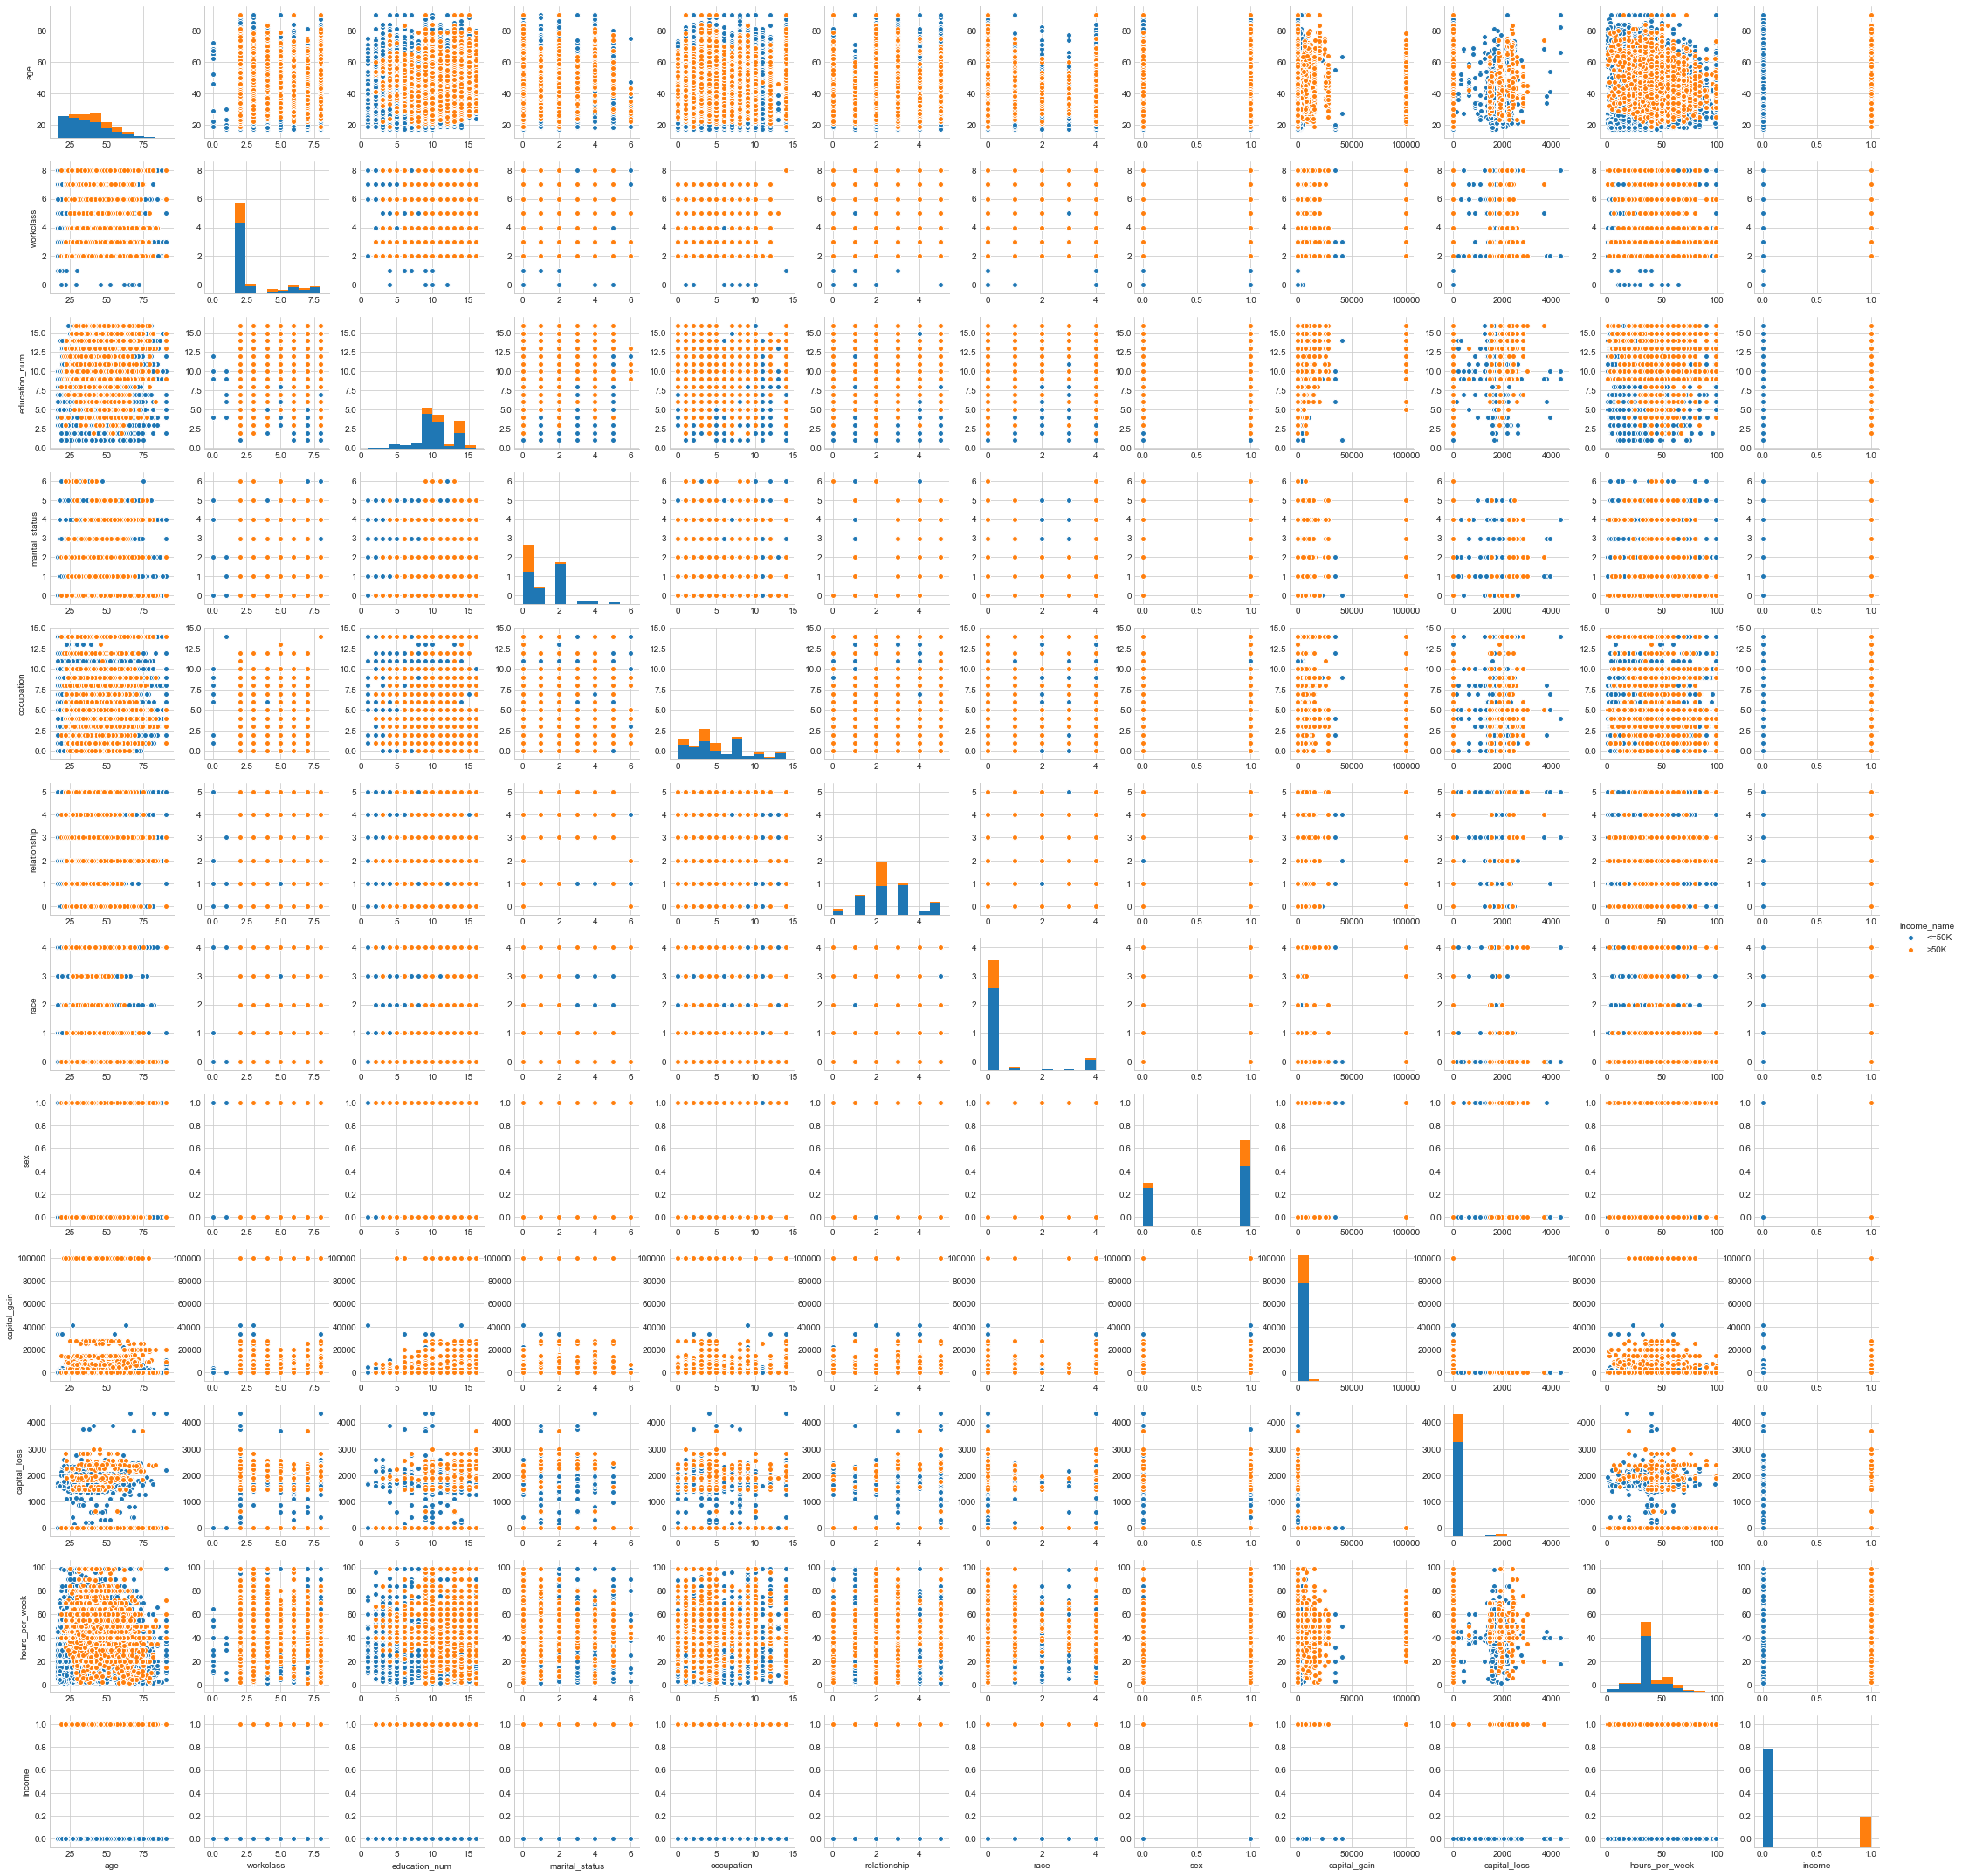

In [16]:
sns.set_style('whitegrid')
sns.pairplot(data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,14,15]], hue='income_name')
plt.show()

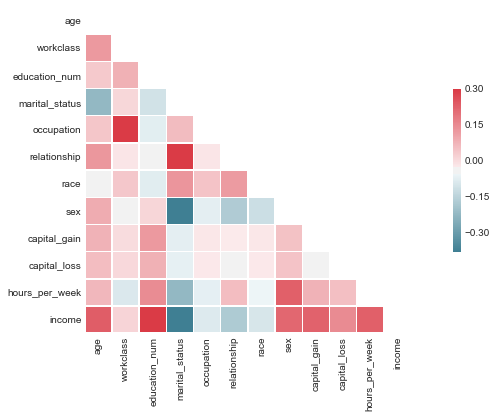

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr,mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [18]:
#choose best K

In [19]:
K_list=[]
cost_value=[]
for k in range (1, 100):
 
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(datalist.iloc[:, :])


# Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    K_list.append(k)
    cost_value.append(interia)
    print ("k:",k, " cost:", interia)
data_K = np.array([K_list,
                cost_value])
data_K_df = pd.DataFrame(data=data_K).T                
#data_K_df.to_csv('data_K_df.csv', sep='\t')


k: 1  cost: 1.78120399149e+12
k: 2  cost: 217683902702.0
k: 3  cost: 55877204688.7
k: 4  cost: 24019368673.3
k: 5  cost: 15408674150.5
k: 6  cost: 9092824095.95
k: 7  cost: 3995266441.05
k: 8  cost: 3005506716.08
k: 9  cost: 2069916440.37
k: 10  cost: 1500426445.07
k: 11  cost: 989631972.423
k: 12  cost: 813696877.93
k: 13  cost: 734404153.902
k: 14  cost: 660037370.559
k: 15  cost: 570564968.164
k: 16  cost: 493635114.881
k: 17  cost: 419268331.538
k: 18  cost: 338381362.601
k: 19  cost: 306487104.953
k: 20  cost: 232734199.269
k: 21  cost: 205146915.185
k: 22  cost: 171119032.443
k: 23  cost: 149475323.913
k: 24  cost: 131615598.184
k: 25  cost: 123660600.967
k: 26  cost: 108550424.291
k: 27  cost: 98628180.1275
k: 28  cost: 90480606.6451
k: 29  cost: 83565158.2104
k: 30  cost: 74362517.3674
k: 31  cost: 68207991.1614
k: 32  cost: 63800562.1268
k: 33  cost: 60988135.0132
k: 34  cost: 55781102.9846
k: 35  cost: 53111004.2229
k: 36  cost: 49740104.4187
k: 37  cost: 46208755.1132
k: 38 

Text(0,0.5,'cost')

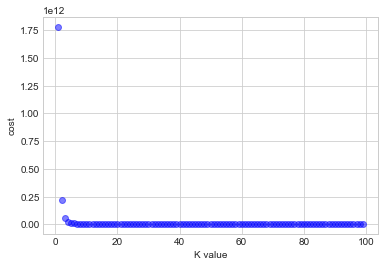

In [20]:
plt.scatter(K_list, cost_value, c="b", alpha=0.5,
            label="cost")
plt.xlabel("K value")
plt.ylabel("cost")

Text(0,0.5,'cost')

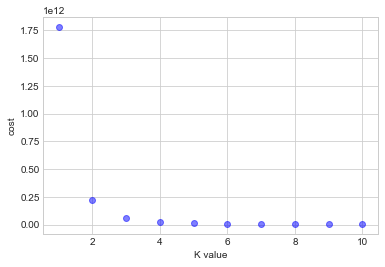

In [21]:
plt.scatter(K_list[0:10], cost_value[0:10], c="b", alpha=0.5,
            label="cost")
plt.xlabel("K value")
plt.ylabel("cost")
#K=4, is converged

In [22]:
datalist.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,7,13,2,8,3,0,1,2174,0,40
1,50,3,13,0,4,2,0,1,0,0,13
2,38,2,9,1,6,3,0,1,0,0,40
3,53,2,7,0,6,2,4,1,0,0,40
4,28,2,13,0,5,0,4,0,0,0,40


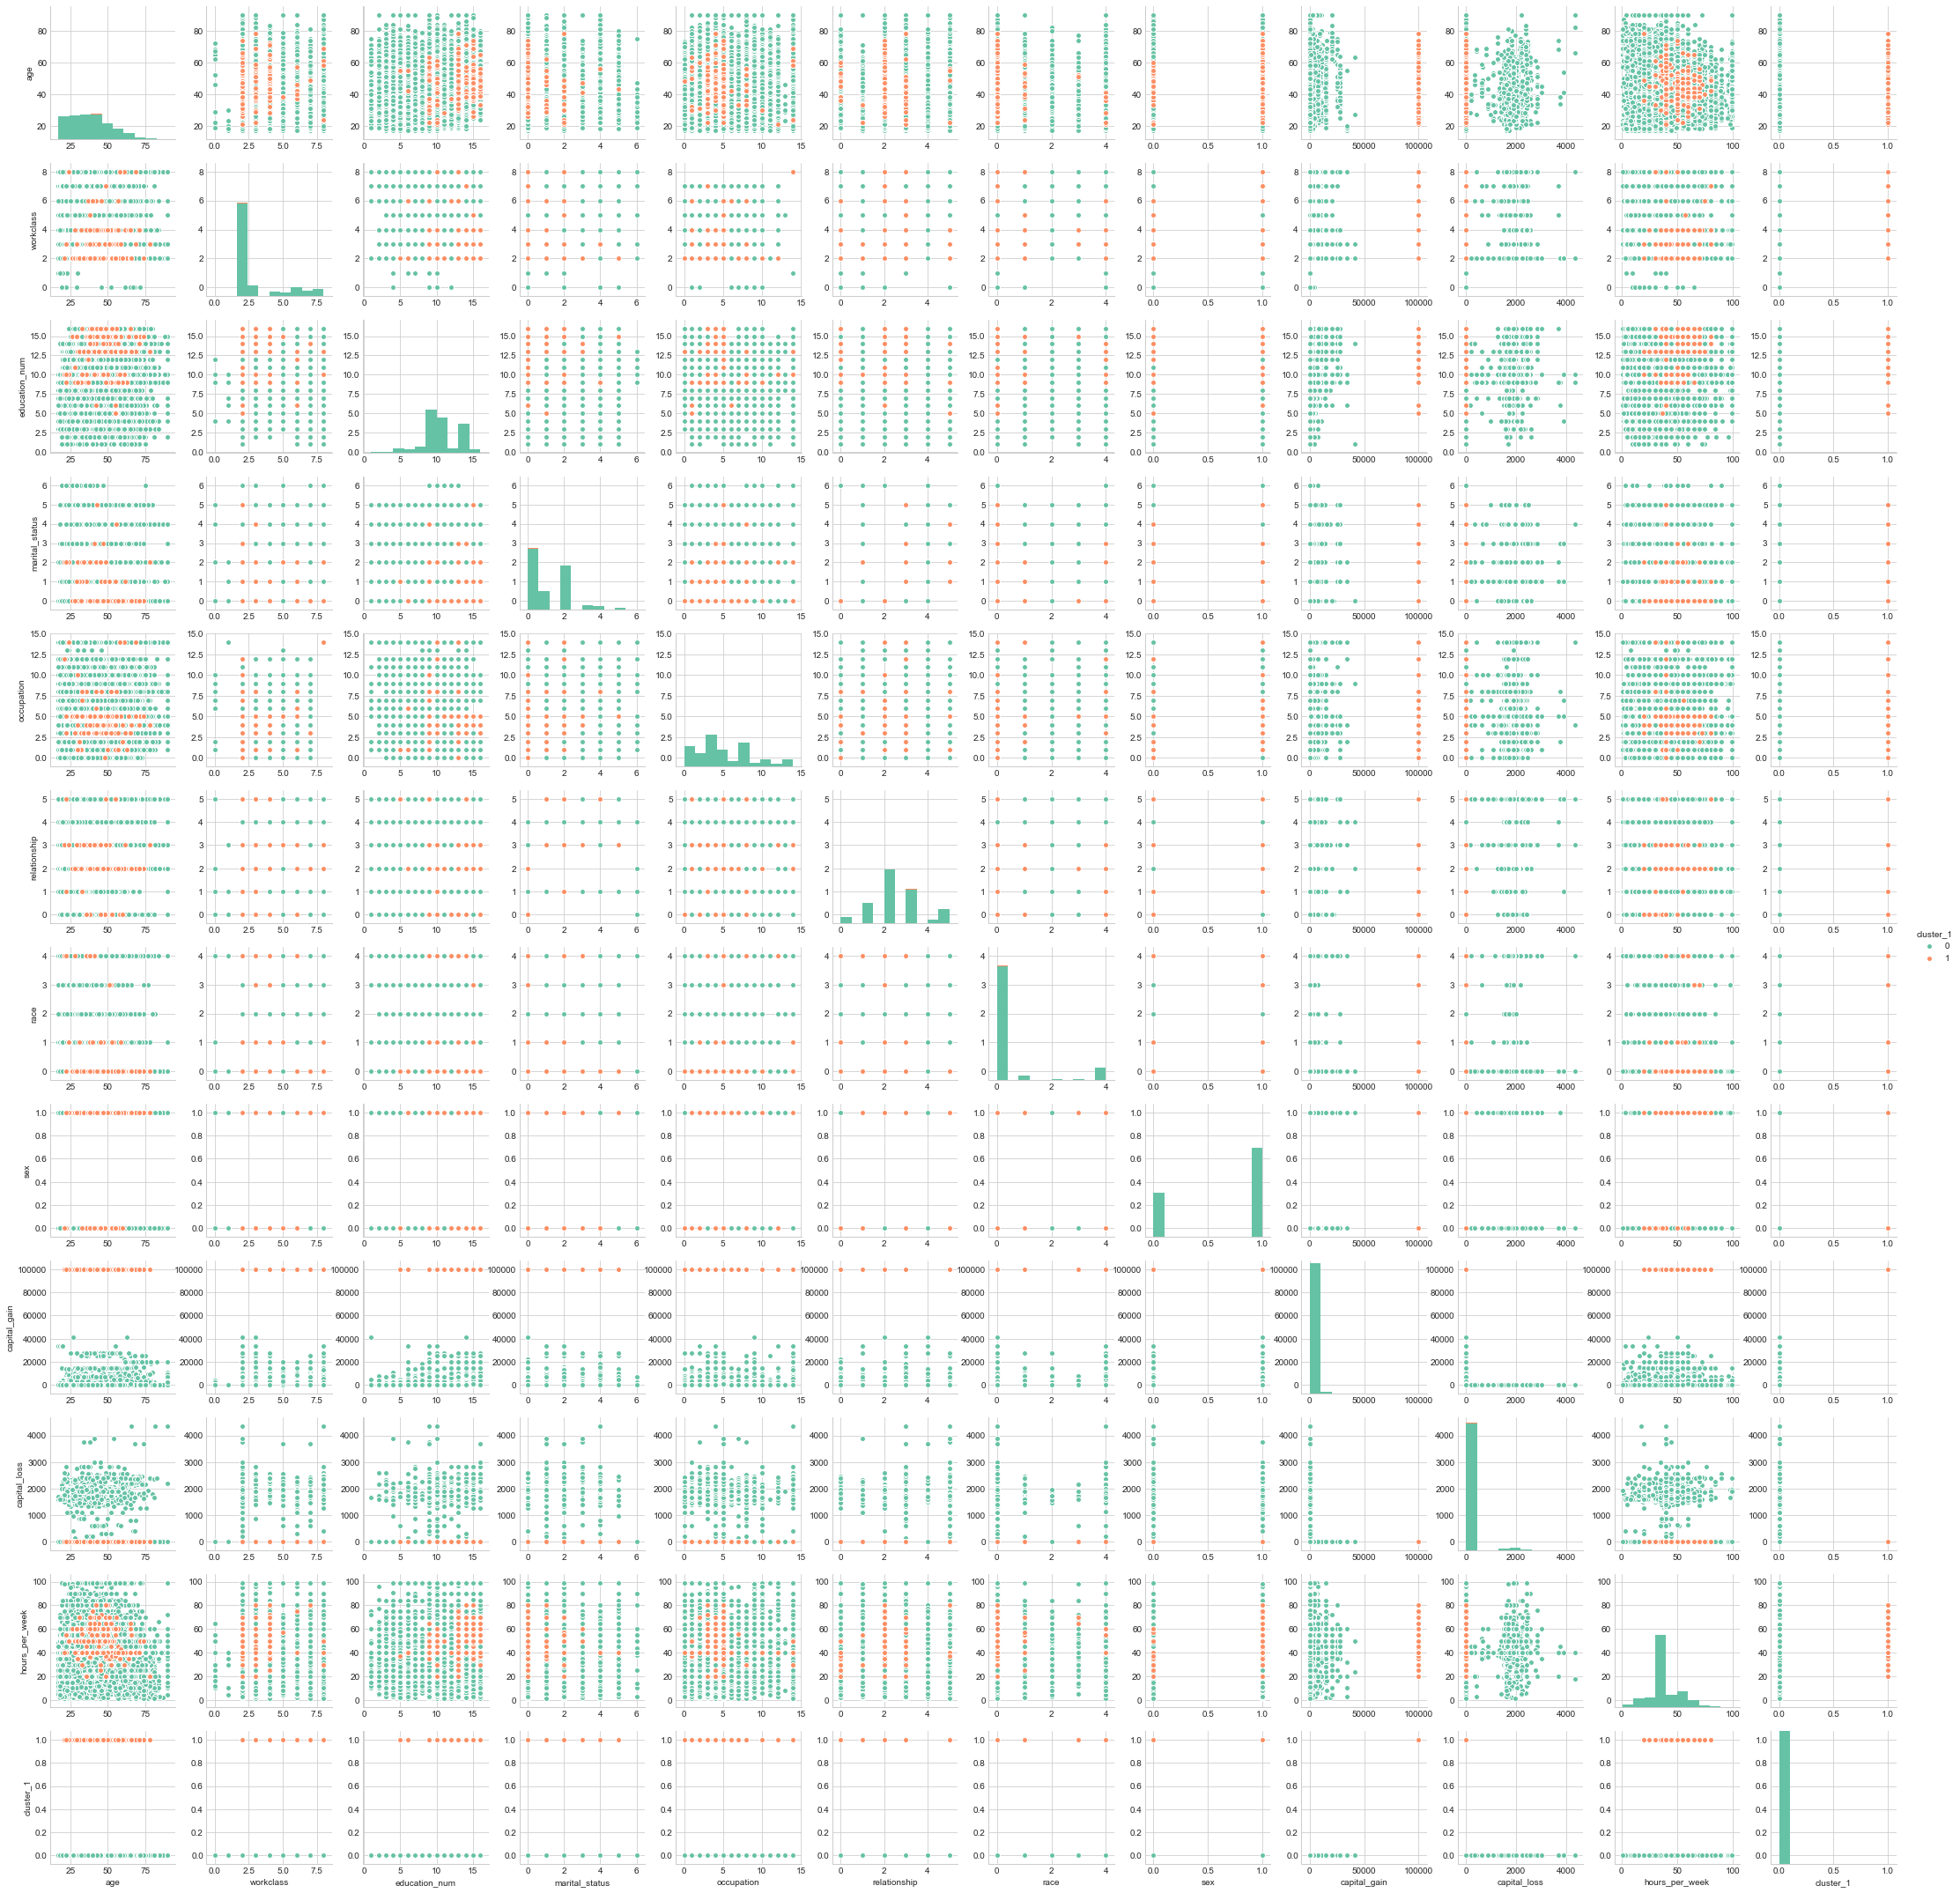

In [23]:
#K=2 K-means when = its classes
kmeans_model_1 = KMeans(n_clusters=2,random_state=123)
distances_1 = kmeans_model_1.fit_transform(data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,14]])
labels_1 = kmeans_model_1.labels_
data['cluster_1']=labels_1
#One new columns have been added to the data, (index=[16]) columns now
with sns.color_palette("Set2", 10):
    sns.pairplot(data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,16]], hue='cluster_1')

In [24]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data['income_name'],labels_1)
tb1

col_0,0,1
income_name,,
<=50K,24720,0
>50K,7682,159


In [25]:
#cluster_1_label
def cluster_1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
data['cluster_1_label']=data['cluster_1'].apply(cluster_1_label)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_name,cluster_1,cluster_1_label
0,39,7,77516,Bachelors,13,2,8,3,0,1,2174,0,40,United-States,0,<=50K,0,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,0,0,13,United-States,0,<=50K,0,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,0,0,40,United-States,0,<=50K,0,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,0,0,40,United-States,0,<=50K,0,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,0,0,40,Cuba,0,<=50K,0,<=50K


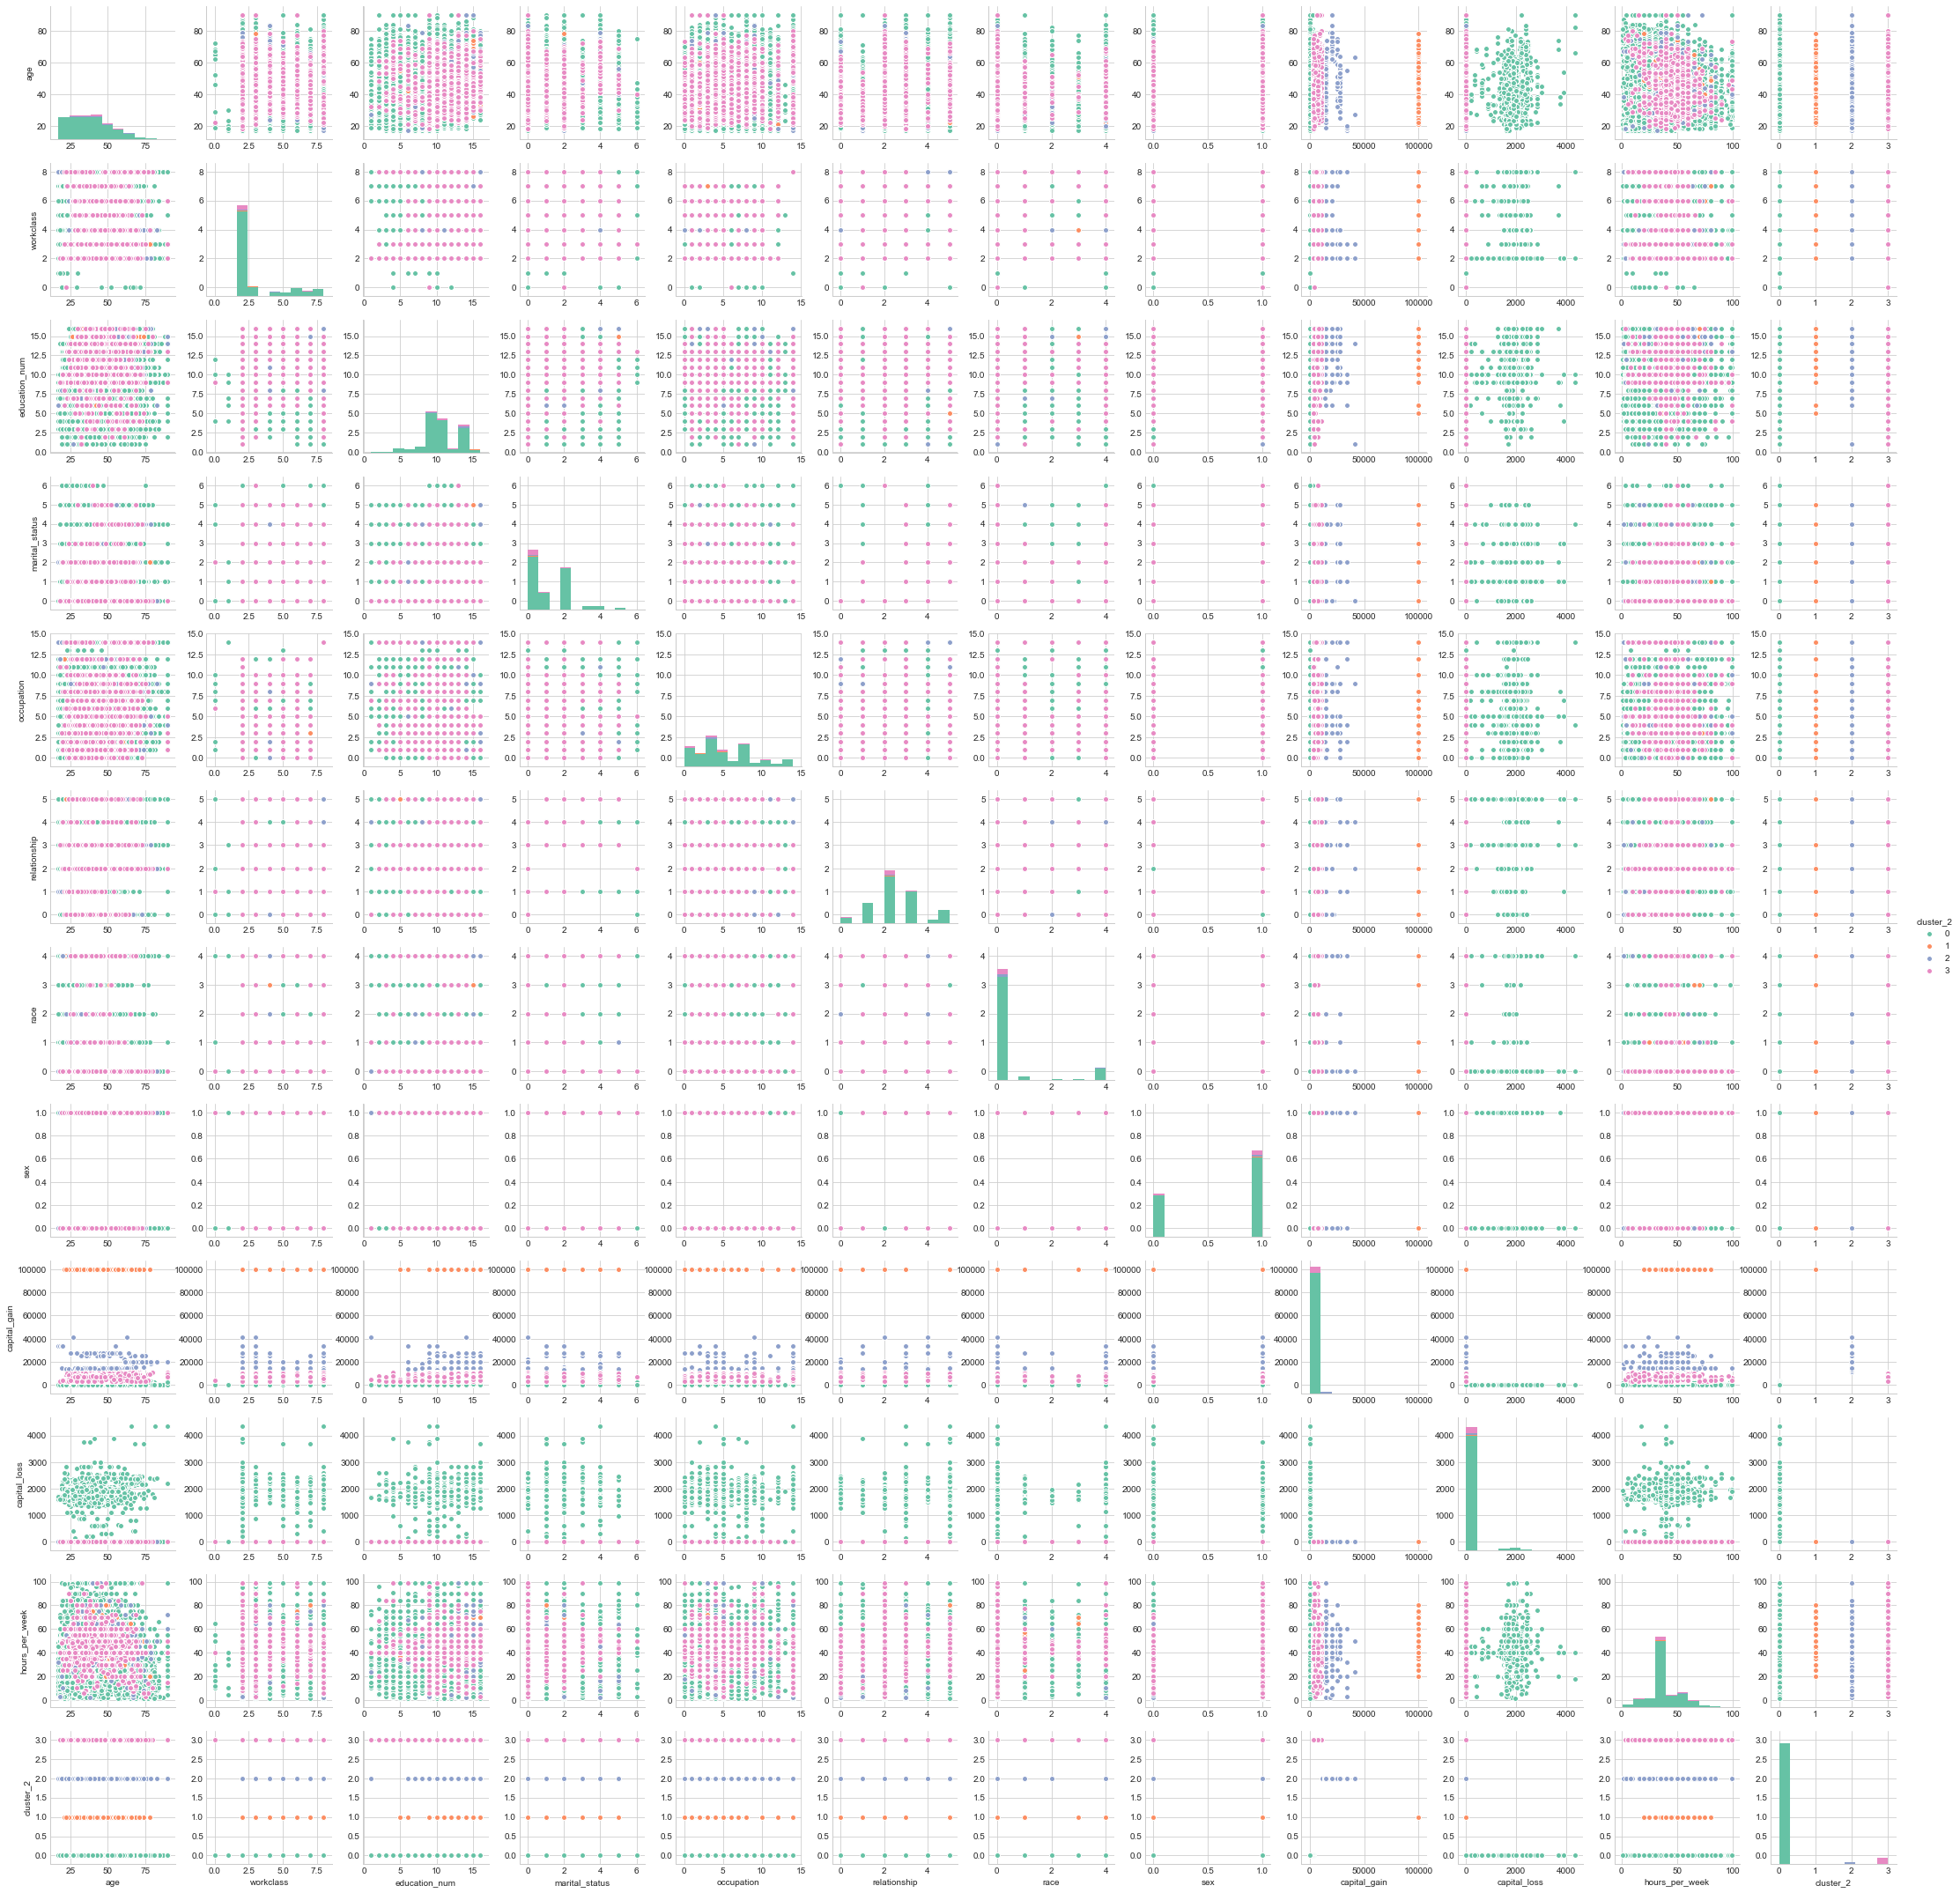

In [26]:
#K=4 K-means when = convergence
kmeans_model_2 = KMeans(n_clusters=4,random_state=123)
distances_2 = kmeans_model_2.fit_transform(data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,14]])
labels_2 = kmeans_model_2.labels_
data['cluster_2']=labels_2
#One new columns have been added to the data, (index=[18]) columns now
with sns.color_palette("Set2", 10):
    sns.pairplot(data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,18]], hue='cluster_2')

In [27]:
#statistics of acceptable_label cluster_2 vs species
tb1 = pd.crosstab(data['income_name'],labels_2)
tb1

col_0,0,1,2,3
income_name,,,,
<=50K,24155,0,8,557
>50K,6164,159,542,976


In [28]:
#cluster_2_label

data['cluster_2_label']=data['cluster_2'].apply(cluster_1_label)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_name,cluster_1,cluster_1_label,cluster_2,cluster_2_label
0,39,7,77516,Bachelors,13,2,8,3,0,1,2174,0,40,United-States,0,<=50K,0,<=50K,0,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,0,0,13,United-States,0,<=50K,0,<=50K,0,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,0,0,40,United-States,0,<=50K,0,<=50K,0,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,0,0,40,United-States,0,<=50K,0,<=50K,0,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,0,0,40,Cuba,0,<=50K,0,<=50K,0,<=50K


In [29]:
#K=40 K-means when = its classes
kmeans_model_3 = KMeans(n_clusters=40,random_state=123)
distances_3 = kmeans_model_3.fit_transform(data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,14]])
labels_3 = kmeans_model_3.labels_
data['cluster_3']=labels_3

In [31]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data['income_name'],labels_3)
tb1

col_0,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
income_name,,,,,,,,,,,,,,,,,,,,,
<=50K,16090,0,0,5,0,125,182,0,71,0,...,54,0,36,58,1,6863,140,14,0,85
>50K,2645,159,67,255,34,0,571,37,104,26,...,0,27,0,26,0,2746,0,5,6,0


In [32]:
#cluster_1_label
def cluster_1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
data['cluster_3_label']=data['cluster_3'].apply(cluster_1_label)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week,native_country,income,income_name,cluster_1,cluster_1_label,cluster_2,cluster_2_label,cluster_3,cluster_3_label
0,39,7,77516,Bachelors,13,2,8,3,0,1,...,40,United-States,0,<=50K,0,<=50K,0,<=50K,36,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,...,13,United-States,0,<=50K,0,<=50K,0,<=50K,35,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,...,40,United-States,0,<=50K,0,<=50K,0,<=50K,0,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,...,40,United-States,0,<=50K,0,<=50K,0,<=50K,35,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,...,40,Cuba,0,<=50K,0,<=50K,0,<=50K,0,<=50K


In [36]:
K2_accuracy = len(data[data['income_name']==data['cluster_1_label']])/len(data)
print('K=2 KMeans -> {0:.4f}%'.format(K2_accuracy*100))

K=2 KMeans -> 76.4074%


In [34]:
K4_accuracy = len(data[data['income_name']==data['cluster_2_label']])/len(data)
print('K=4 KMeans -> {0:.4f}%'.format(K4_accuracy*100))

K=4 KMeans -> 79.3342%


In [38]:
K40_accuracy = len(data[data['income_name']==data['cluster_3_label']])/len(data)
print('K=40 KMeans -> {0:.4f}%'.format(K40_accuracy*100))

K=40 KMeans -> 81.6375%


In [39]:
#find center of K-means
centroids1 = kmeans_model_1.cluster_centers_
print (centroids1)

[[  3.85434850e+01   3.02891797e+00   1.00667551e+01   1.08122955e+00
    5.26294673e+00   2.38244553e+00   4.60650577e-01   6.68261218e-01
    5.92231436e+02   8.77322388e+01   4.03915190e+01   2.37084131e-01]
 [  4.63584906e+01   2.98742138e+00   1.29182390e+01   3.14465409e-01
    4.58490566e+00   2.05660377e+00   2.76729560e-01   8.61635220e-01
    9.99990000e+04  -2.98427949e-13   4.97987421e+01   1.00000000e+00]]


In [40]:
d_corr1=data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,16]].corr()
d_corr1


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,cluster_1
age,1.000000,0.123757,0.036527,-0.220938,0.040707,0.128919,-0.029869,0.088832,0.077674,0.057775,0.068756,0.039939
workclass,0.123757,1.000000,0.081700,0.010313,0.462679,-0.018363,0.038328,-0.046918,0.001275,0.006988,-0.088747,-0.001551
education_num,0.036527,0.081700,1.000000,-0.107648,-0.075714,-0.031898,-0.078799,0.012280,0.122630,0.079923,0.148123,0.077263
marital_status,-0.220938,0.010313,-0.107648,1.000000,0.060346,0.362819,0.131782,-0.380043,-0.074308,-0.066966,-0.221882,-0.045086
occupation,0.040707,0.462679,-0.075714,0.060346,1.000000,-0.018398,0.045215,-0.073014,-0.019173,-0.021487,-0.070831,-0.013144
relationship,0.128919,-0.018363,-0.031898,0.362819,-0.018398,1.000000,0.120530,-0.169737,-0.026656,-0.030640,0.056941,-0.018355
race,-0.029869,0.038328,-0.078799,0.131782,0.045215,0.120530,1.000000,-0.117363,-0.019990,-0.023926,-0.054443,-0.010579
sex,0.088832,-0.046918,0.012280,-0.380043,-0.073014,-0.169737,-0.117363,1.000000,0.048480,0.045567,0.229309,0.028650
capital_gain,0.077674,0.001275,0.122630,-0.074308,-0.019173,-0.026656,-0.019990,0.048480,1.000000,-0.031615,0.078409,0.938300
capital_loss,0.057775,0.006988,0.079923,-0.066966,-0.021487,-0.030640,-0.023926,0.045567,-0.031615,1.000000,0.054256,-0.015177


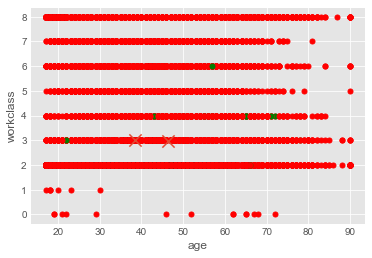

In [71]:
# age and workclass are chosen for plot
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
colors = ['r.', 'g.', 'b.', 'y.']
start_time = time.time()

for i in range(len(data)):
    plt.plot(data.iloc[i,0],data.iloc[i,1], colors[data.iloc[i,16]], markersize = 10)    
elapsed_time = time.time() - start_time
plt.scatter(centroids1[:,0], centroids1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('age')
plt.ylabel('workclass')
plt.show()


In [41]:
#K=4
#find center of K-means
centroids2 = kmeans_model_2.cluster_centers_
print (centroids2)

[[  3.81520829e+01   3.02496784e+00   9.98139780e+00   1.12068340e+00
    5.28546456e+00   2.39724265e+00   4.71321614e-01   6.59157624e-01
    3.15997889e+01   9.37596886e+01   4.01168244e+01   2.03304858e-01]
 [  4.63584906e+01   2.98742138e+00   1.29182390e+01   3.14465409e-01
    4.58490566e+00   2.05660377e+00   2.76729560e-01   8.61635220e-01
    9.99990000e+04  -2.98427949e-13   4.97987421e+01   1.00000000e+00]
 [  4.68745455e+01   2.99090909e+00   1.25490909e+01   5.72727273e-01
    4.70909091e+00   2.20181818e+00   2.94545455e-01   8.07272727e-01
    1.65477018e+04   7.53175300e-13   4.68763636e+01   9.85454545e-01]
 [  4.32954990e+01   3.12067841e+00   1.08643183e+01   4.83365949e-01
    5.01630789e+00   2.15459883e+00   3.09197652e-01   7.98434442e-01
    5.95575538e+03   2.01794137e-12   4.34977169e+01   6.36660144e-01]]


In [42]:
d_corr2=data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,18]].corr()
d_corr2

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,cluster_2
age,1.000000,0.123757,0.036527,-0.220938,0.040707,0.128919,-0.029869,0.088832,0.077674,0.057775,0.068756,0.105919
workclass,0.123757,1.000000,0.081700,0.010313,0.462679,-0.018363,0.038328,-0.046918,0.001275,0.006988,-0.088747,0.009061
education_num,0.036527,0.081700,1.000000,-0.107648,-0.075714,-0.031898,-0.078799,0.012280,0.122630,0.079923,0.148123,0.118675
marital_status,-0.220938,0.010313,-0.107648,1.000000,0.060346,0.362819,0.131782,-0.380043,-0.074308,-0.066966,-0.221882,-0.129669
occupation,0.040707,0.462679,-0.075714,0.060346,1.000000,-0.018398,0.045215,-0.073014,-0.019173,-0.021487,-0.070831,-0.022973
relationship,0.128919,-0.018363,-0.031898,0.362819,-0.018398,1.000000,0.120530,-0.169737,-0.026656,-0.030640,0.056941,-0.046976
race,-0.029869,0.038328,-0.078799,0.131782,0.045215,0.120530,1.000000,-0.117363,-0.019990,-0.023926,-0.054443,-0.033609
sex,0.088832,-0.046918,0.012280,-0.380043,-0.073014,-0.169737,-0.117363,1.000000,0.048480,0.045567,0.229309,0.074453
capital_gain,0.077674,0.001275,0.122630,-0.074308,-0.019173,-0.026656,-0.019990,0.048480,1.000000,-0.031615,0.078409,0.336940
capital_loss,0.057775,0.006988,0.079923,-0.066966,-0.021487,-0.030640,-0.023926,0.045567,-0.031615,1.000000,0.054256,-0.057235


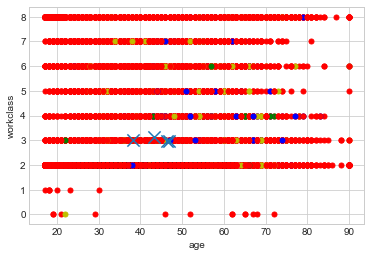

In [45]:
# K=4
import time
colors = ['r.', 'g.', 'b.', 'y.']

for i in range(len(data)):
    plt.plot(data.iloc[i,0],data.iloc[i,1], colors[data.iloc[i,18]], markersize = 10)    
plt.scatter(centroids2[:,0], centroids2[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('age')
plt.ylabel('workclass')
plt.show()


In [47]:
#K=80 K-means when = its classes
kmeans_model_4 = KMeans(n_clusters=80,random_state=123)
distances_4 = kmeans_model_4.fit_transform(data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,14]])
labels_4 = kmeans_model_4.labels_
data['cluster_4']=labels_4

In [48]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data['income_name'],labels_4)
tb1

col_0,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
income_name,,,,,,,,,,,,,,,,,,,,,
<=50K,4610,0,0,14,0,31,55,0,0,70,...,86,4330,14,606,40,1,39,28,0,687
>50K,1196,159,352,14,34,0,403,55,37,0,...,0,401,0,76,0,3,0,19,23,102


In [49]:
#cluster_1_label
data['cluster_4_label']=data['cluster_4'].apply(cluster_1_label)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,income,income_name,cluster_1,cluster_1_label,cluster_2,cluster_2_label,cluster_3,cluster_3_label,cluster_4,cluster_4_label
0,39,7,77516,Bachelors,13,2,8,3,0,1,...,0,<=50K,0,<=50K,0,<=50K,36,<=50K,24,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,...,0,<=50K,0,<=50K,0,<=50K,35,<=50K,73,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,...,0,<=50K,0,<=50K,0,<=50K,0,<=50K,0,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,...,0,<=50K,0,<=50K,0,<=50K,35,<=50K,54,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,...,0,<=50K,0,<=50K,0,<=50K,0,<=50K,71,<=50K


In [50]:
K4_accuracy = len(data[data['income_name']==data['cluster_4_label']])/len(data)
print('K=4 KMeans -> {0:.4f}%'.format(K4_accuracy*100))

K=4 KMeans -> 82.1596%


In [63]:
scanK = pd.DataFrame(data=datalist_label[0:],
                   columns=['income'])
scanK['income_name'] =data.income_name
scanK.head()

,income,income_name
0,0,<=50K
1,0,<=50K
2,0,<=50K
3,0,<=50K
4,0,<=50K


In [65]:
#for loop for K-means 
for i in range(1,100):
    kmeans_model_i = KMeans(n_clusters=i,random_state=123)
    distances_i = kmeans_model_i.fit_transform(data.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,14]])
    labels_i = kmeans_model_i.labels_
    scanK['cluster_i']=labels_i
    tb1 = pd.crosstab(data['income_name'],labels_i)
    scanK['cluster_i_label']=scanK['cluster_i'].apply(cluster_1_label)
    Ki_accuracy = len(scanK[scanK['income_name']==scanK['cluster_i_label']])/len(scanK)
    print('K=',i,' KMeans -> {0:.4f}%'.format(Ki_accuracy*100))

K= 1  KMeans -> 75.9190%
K= 2  KMeans -> 76.4074%
K= 3  KMeans -> 79.9914%
K= 4  KMeans -> 79.3342%
K= 5  KMeans -> 79.0608%
K= 6  KMeans -> 79.9914%
K= 7  KMeans -> 80.1665%
K= 8  KMeans -> 80.1665%
K= 9  KMeans -> 80.1634%
K= 10  KMeans -> 80.1665%
K= 11  KMeans -> 80.1880%
K= 12  KMeans -> 80.1849%
K= 13  KMeans -> 80.2310%
K= 14  KMeans -> 80.1880%
K= 15  KMeans -> 80.1880%
K= 16  KMeans -> 80.1849%
K= 17  KMeans -> 80.1849%
K= 18  KMeans -> 80.1849%
K= 19  KMeans -> 80.2739%
K= 20  KMeans -> 80.2893%
K= 21  KMeans -> 81.4011%
K= 22  KMeans -> 81.3274%
K= 23  KMeans -> 81.2475%
K= 24  KMeans -> 81.0847%
K= 25  KMeans -> 81.2629%
K= 26  KMeans -> 81.1277%
K= 27  KMeans -> 81.5577%
K= 28  KMeans -> 81.5577%
K= 29  KMeans -> 81.5086%
K= 30  KMeans -> 81.5086%
K= 31  KMeans -> 81.6222%
K= 32  KMeans -> 81.5853%
K= 33  KMeans -> 81.5761%
K= 34  KMeans -> 81.7297%
K= 35  KMeans -> 81.9938%
K= 36  KMeans -> 81.5915%
K= 37  KMeans -> 81.5853%
K= 38  KMeans -> 82.0092%
K= 39  KMeans -> 81.8